In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt
import pandas as pd

In [2]:
bus = 73
samples = 20000
nLabel = 2
level = 75

Bra_data = loadtxt('BranchData.dat')
PF_data   = loadtxt(('PF_Profile_%d.csv' %bus), delimiter=',')

branch = Bra_data.shape[0]
index1 = int(0.8*samples)
index2 = int(0.1*samples)
index3 = index1 + index2

idxs = range(index3,samples)



In [3]:
# Verify label between prediction and test data
Label = np.zeros([index2,PF_data.shape[1]])
PF_Percent = PF_data[idxs] / Bra_data[:,5]

# Label each branch as either 1, 2, or 3
Label = (np.abs(PF_Percent) >= level/100 ) * 1# + \
# np.all([(np.abs(PF_Percent) <= 0.95),(np.abs(PF_Percent) > 0.75)], axis = 0) * 2 + \
# (np.abs(PF_Percent) > 0.95) * 3


In [4]:
result = np.zeros([3,6])
err_s = np.zeros([3,6])

i = 0

for j in range(70, 100, 5):
    # Label each branch as either 1, 2, or 3
    Label = (np.abs(PF_Percent) >= j/100 ) * 1
    
    #Compare the result of each model at each level
    NN_data  = loadtxt(('Result/NN_%d_PF_Predict_%d.csv' %(j, bus)), delimiter=',')
    CNN_data = loadtxt(('Result/CNN_%d_PF_Predict_%d.csv' %(j, bus)), delimiter=',')
    GNN_data = loadtxt(('Result/GNN_%d_PF_Predict_%d.csv' %(j, bus)), delimiter=',')
    
    result[0,i] = index2 * branch - np.sum(Label+1 == NN_data)
    result[1,i] = index2 * branch - np.sum(Label+1 == CNN_data)
    result[2,i] = index2 * branch - np.sum(Label+1 == GNN_data)
    
    err_s[0,i] = np.sum(np.sum(Label+1 != NN_data,  axis = 1) != 0)
    err_s[1,i] = np.sum(np.sum(Label+1 != CNN_data, axis = 1) != 0)
    err_s[2,i] = np.sum(np.sum(Label+1 != GNN_data, axis = 1) != 0)
    i = i+1

In [5]:
Error_Rate = result/(index2*branch) * 100
Error_Branch = result
Error_Sample = err_s

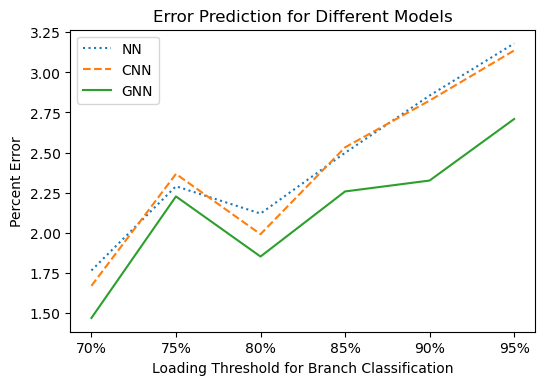

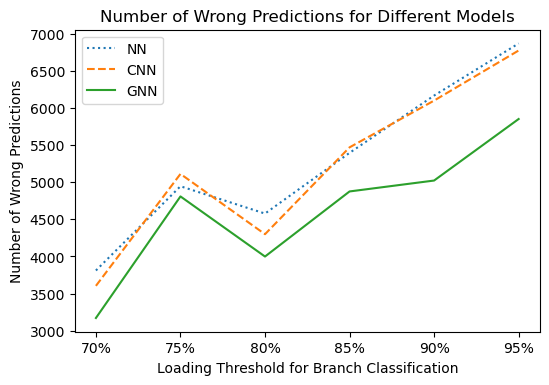

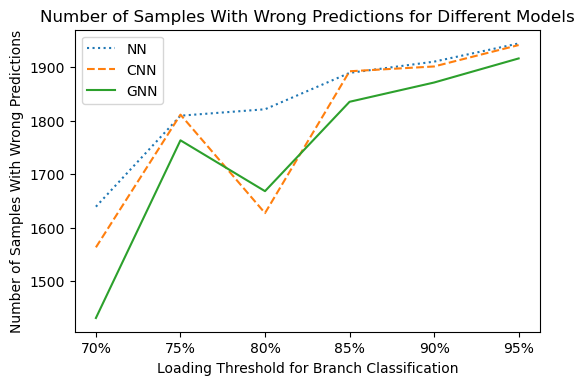

In [8]:
# Plot the result  
xname = [ '70%', '75%', '80%', '85%', '90%', '95%' ] 

plt.figure(dpi=100)       
plt.plot(range(70, 100, 5),Error_Rate[0,:], label = "NN"   , linestyle = ':')
plt.plot(range(70, 100, 5),Error_Rate[1,:], label = "CNN"  , linestyle = '--')
plt.plot(range(70, 100, 5),Error_Rate[2,:], label = "GNN"  , linestyle = '-')
plt.legend()
plt.xlabel('Loading Threshold for Branch Classification')
plt.xticks(ticks=range(70, 100, 5), labels = xname)
plt.ylabel('Percent Error')
plt.title("Error Prediction for Different Models")
plt.savefig("Plot/Error Prediction for Different Models_{}.png".format(bus))


# Plot the result  
plt.figure(dpi=100)       
plt.plot(range(70, 100, 5),Error_Branch[0,:], label = "NN"   , linestyle = ':')
plt.plot(range(70, 100, 5),Error_Branch[1,:], label = "CNN"  , linestyle = '--')
plt.plot(range(70, 100, 5),Error_Branch[2,:], label = "GNN"  , linestyle = '-')
plt.legend()
plt.xlabel('Loading Threshold for Branch Classification')
plt.xticks(ticks=range(70, 100, 5), labels = xname)
plt.ylabel("Number of Wrong Predictions")
plt.title("Number of Wrong Predictions for Different Models")
plt.savefig("Plot/Number of Wrong Predictions for Different Models_{}.png".format(bus))

# Plot the result  
plt.figure(dpi=100)       
plt.plot(range(70, 100, 5),Error_Sample[0,:], label = "NN"   , linestyle = ':')
plt.plot(range(70, 100, 5),Error_Sample[1,:], label = "CNN"  , linestyle = '--')
plt.plot(range(70, 100, 5),Error_Sample[2,:], label = "GNN"  , linestyle = '-')
plt.legend()
plt.xlabel('Loading Threshold for Branch Classification')
plt.xticks(ticks=range(70, 100, 5), labels = xname)
plt.ylabel("Number of Samples With Wrong Predictions")
plt.title("Number of Samples With Wrong Predictions for Different Models")
plt.savefig("Plot/Number of Samples With Wrong Predictions for Different Models_{}.png".format(bus))

In [7]:
# Write result into excel data file
df_ER = pd.DataFrame(np.round(Error_Rate, decimals=5), index=['NN', 'CNN', 'GNN'], columns=range(70, 100, 5))
print(df_ER)
df_EB = pd.DataFrame(Error_Branch, index=['NN', 'CNN', 'GNN'], columns=range(70, 100, 5))
print(df_EB)
df_ES = pd.DataFrame(Error_Sample, index=['NN', 'CNN', 'GNN'], columns=range(70, 100, 5))
print(df_ES)
with pd.ExcelWriter('Result/Model_Comparison.xlsx') as writer:
    df_ER.to_excel(writer, sheet_name='Error_Rate')
    df_EB.to_excel(writer, sheet_name='Error_Branch')
    df_ES.to_excel(writer, sheet_name='Error_Sample')

          70       75       80       85       90       95
NN   1.76435  2.28981  2.11944  2.49815  2.85556  3.18056
CNN  1.66852  2.36667  1.99074  2.53241  2.82407  3.13657
GNN  1.46806  2.22639  1.85139  2.25741  2.32546  2.70926
         70      75      80      85      90      95
NN   3811.0  4946.0  4578.0  5396.0  6168.0  6870.0
CNN  3604.0  5112.0  4300.0  5470.0  6100.0  6775.0
GNN  3171.0  4809.0  3999.0  4876.0  5023.0  5852.0
         70      75      80      85      90      95
NN   1639.0  1809.0  1821.0  1889.0  1910.0  1944.0
CNN  1563.0  1811.0  1627.0  1892.0  1901.0  1941.0
GNN  1431.0  1763.0  1668.0  1835.0  1871.0  1916.0
